# Introduction to Tokenizers, LLMs, and Embeddings
This notebook takes you on a journey through fundamental concepts of large language models: tokenization, language model architecture, text generation, and embeddings. Follow along as we explore how text is processed by different types of models and compare their behaviors.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ij3-69IJ79MtcjjYk07ckSCf9AoB021c?usp=sharing)

## Setting Up Our Environment

We begin by installing all necessary packages for our exploration. This includes LangChain for building applications with LLMs, OpenAI's libraries, vector stores like Chroma, and various text processing tools. We also install visualization tools and tensor libraries that will help us analyze and display our findings.

In [1]:
#install all proper packages
!pip install -qU langchain langchain_huggingface langchain-community langchain-core langchain-openai langchain-text-splitters \
  openai chromadb pypdf xmltodict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.4 MB/s eta 0:00:

In [2]:
!pip install -q tiktoken transformers torch
#!pip install -q https://download.pytorch.org/whl/cu121/torch-2.2.1%2Bcu121-cp310-cp310-linux_x86_64.whl#sha256=1adf430f01ff649c848ac021785e18007b0714fdde68e4e65bd0c640bf3fb8e1

In [3]:
!pip install -U -q bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 17.8 MB/s eta 0:00:00


In [4]:
!sudo apt-get install graphviz graphviz-dev
!pip -q install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 38 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [5]:
!pip freeze | grep "lang\|openai\|tiktoken|\chroma"

google-ai-generativelanguage==0.6.15
google-cloud-language==2.18.0
langchain==1.0.2
langchain-classic==1.0.0
langchain-community==0.4
langchain-core==1.0.0
langchain-huggingface==1.0.0
langchain-openai==1.0.1
langchain-text-splitters==1.0.0
langcodes==3.5.0
langgraph==1.0.1
langgraph-checkpoint==3.0.0
langgraph-prebuilt==1.0.1
langgraph-sdk==0.2.9
langsmith==0.4.37
language_data==1.3.0
libclang==18.1.1
openai==2.6.0


Next, we set up our API connections. We're configuring LangSmith tracing to help analyze our LLM calls and connecting to OpenAI's API using a key stored in Google Colab's user environment.

In [6]:
from google.colab import userdata
import os

if userdata.get("MDX_LANGSMITH_API_KEY"):
  os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
  os.environ["LANGCHAIN_TRACING_V2"]="true"
  os.environ["LANGSMITH_API_KEY"] = userdata.get("MDX_LANGSMITH_API_KEY")
  os.environ["LANGSMITH_PROJECT"] = "mdx-conclave-2025"

In [7]:
# Set OpenAI API key from Google Colab's user environment or default
def set_openai_api_key(default_key: str = "YOUR_API_KEY") -> None:
    """Set the OpenAI API key from Google Colab's user environment or use a default value."""
    #if not (userdata.get("OPENAI_API_KEY") or "OPENAI_API_KEY" in os.environ):
    os.environ["OPENAI_API_KEY"] = userdata.get("MDX_OPENAI_API_KEY") or default_key


set_openai_api_key()
#set_openai_api_key("sk-...")

## Exploring Data Processing with LLMs

Before diving into models, we need data to work with. This section prepares us for analyzing how different text samples will be processed by various tokenizers and models. We're setting the stage for comparing English and Italian text to observe how language models handle different languages.

In [8]:
import pprint

In [9]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_openai import OpenAIEmbeddings
from sentence_transformers import SentenceTransformer
# Import necessary libraries
from transformers import (
  AutoTokenizer,
  AutoModel,
  GPT2Tokenizer,
  GPT2LMHeadModel,
  AutoModelForSeq2SeqLM,
  AutoModelForCausalLM
)

In [10]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Understanding Tokenization Across Different Architecture Types

Now we dive into the heart of language processing - tokenization. This process converts raw text into numerical representations that models can work with. We'll examine how three major model architectures handle tokenization differently: encoders (like BERT), decoders (like GPT), and encoder-decoders (like T5).

Each architecture has its own tokenization strategy that affects how it processes and understands text. We'll test identical phrases in English and Italian to see these differences in action.

In [11]:
input_text = "Welcome to the Generative AI Conclave: LangChain Certification Programme"
input_text_ar = "مرحبًا بكم في Generative AI Conclave: برنامج شهادة LangChain"

BERT, as an encoder architecture, processes the entire input at once. Notice how it tokenizes our English and Italian texts differently. The tokenizer breaks down words into subwords, and you can see that the Italian text produces different token IDs than English due to vocabulary differences. BERT's tokenization is particularly optimized for bidirectional understanding of context.

In [12]:
## Encoder
# Load the tokenizer and model
model = AutoModel.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
tokenizer(input_text, return_tensors='pt').input_ids

tensor([[  101,  6160,  2000,  1996, 11416,  6024,  9932,  9530, 23650,  1024,
         11374, 24925,  2078, 10618,  4746,   102]])

In [14]:
tokenizer(input_text_ar, return_tensors='pt').input_ids

tensor([[  101,  1295, 17149, 29820, 29816, 25573,  1271, 29835, 22192,  1291,
         14498, 11416,  6024,  9932,  9530, 23650,  1024,  1271, 17149, 15915,
         25573, 22192, 29819,  1283, 14157, 25573, 15394, 19433, 11374, 24925,
          2078,   102]])

GPT-2, as a decoder model, processes text sequentially from left to right. Its tokenization scheme is designed for predicting the next token in a sequence. Notice how its tokenization of Italian text differs from BERT's - GPT-2 might split words differently since its vocabulary was trained primarily on English web text.

In [15]:
## Decoder
# Load the tokenizer and model
model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [16]:
tokenizer(input_text, return_tensors='pt').input_ids

tensor([[14618,   284,   262,  2980,   876,  9552,  1482, 44281,    25, 16332,
         35491, 40609, 35232]])

In [17]:
tokenizer(input_text_ar, return_tensors='pt').input_ids

tensor([[25405, 26897,   148,   255, 39848,   149,   233, 12919, 17550,   101,
           149,   225, 25405, 18923,   223, 22654,  2980,   876,  9552,  1482,
         44281,    25, 17550,   101, 26897, 23338, 12919, 25405,   148,   105,
         17550,   112, 29519, 34247,   107, 45632, 16332, 35491]])

T5 combines both encoder and decoder architectures, making it suitable for tasks like translation and summarization. Its tokenizer handles multilingual text differently than either BERT or GPT-2, often with more flexibility across languages since it was trained on multilingual data.

In [18]:
## Encoder-Decoder
# Load the tokenizer and model
model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-base")
tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-base")
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [19]:
tokenizer(input_text, return_tensors='pt').input_ids

tensor([[ 5242,    12,     8,  5945,    49,  1528,  7833,  1193, 18780,    15,
            10,  7073,  3541,     9,    77, 16013, 11729,     1]])

In [20]:
tokenizer(input_text_ar, return_tensors='pt').input_ids

tensor([[    3,     2,     3,     2,     3,     2,  5945,    49,  1528,  7833,
          1193, 18780,    15,    10,     3,     2,     3,     2,  7073,  3541,
             9,    77,     1]])

We've created helper functions to calculate embedding vectors and measure their similarities using cosine similarity. This will help us analyze how different models understand semantic relationships between sentences.

We're testing three top embedding models:

- `MPNet` - A Transformer model that combines BERT's bidirectional context and XLNet's permutation-based training
- `OpenAI text-embedding-3-large` - OpenAI's powerful and recent embedding model with 3072 dimensions
- `BGE-M3` - ByteDance's multilingual embedding model optimized for semantic search

Our test sentences deliberately include ambiguous phrases and related concepts to see how each model handles semantic subtleties around "flying" and "fear."

## Exploring Text Embeddings and Similarity
In the final section, we shift focus to embeddings - dense vector representations of text that capture semantic meaning. We'll compare three different embedding models by examining how they encode similar concepts.

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch

def compute_similarity_matrix(embeddings_list):
    """Computes the cosine similarity matrix from a list of embeddings."""
    num_sentences = len(embeddings_list)
    similarity_matrix = np.zeros((num_sentences, num_sentences))

    for i in range(num_sentences):
        for j in range(i, num_sentences):  # Iterate only upper triangular part
            if isinstance(embeddings_list, torch.Tensor):
                _embeddings_list = embeddings_list.detach().numpy()
                embedding_i, embedding_j = [list(_embeddings_list[i])], [list(_embeddings_list[j])]
            else:
                embedding_i, embedding_j = [embeddings_list[i]], [embeddings_list[j]]
            #similarity = np.dot(embedding_i, embedding_j)
            similarity = np.ndarray.flatten(cosine_similarity(embedding_i, embedding_j))[0]
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Fill symmetric part

    np.fill_diagonal(similarity_matrix, 1)
    return similarity_matrix

def get_embeddings(model, sentences, use_encode=True):
    """Gets embeddings for sentences using a specified model."""
    if not use_encode:
        embeddings_list = [model.embed_query(s) for s in sentences]
    else:
        embeddings_list = model.encode(sentences)
    return embeddings_list

In [22]:
# Initialize models
mpnet_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
openai_embedding = OpenAIEmbeddings(model="text-embedding-3-large")
bge_embedding = SentenceTransformer("BAAI/bge-m3")
#sci_model = SentenceTransformer('fine-tuned/jinaai_jina-embeddings-v2-base-en-scientific-papers-from-arxiv', trust_remote_code=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [23]:
sentences = [
    "I like flying",
    "I have aerophobia",
    "I'm scared to fly",
    "A fly can scare me",
    "I fear scary pictures of airplanes in the clouds",
    "I have airplane photos in my cloud"
]

In [24]:
# Generate embeddings and similarity matrices
mpnet_embeddings_list = get_embeddings(mpnet_embeddings, sentences, use_encode=False)
mpnet_matrix = compute_similarity_matrix(mpnet_embeddings_list)

openai_embeddings_list = get_embeddings(openai_embedding, sentences, use_encode=False)
openai_matrix = compute_similarity_matrix(openai_embeddings_list)

bge_embeddings_list = get_embeddings(bge_embedding, sentences)
bge_matrix = compute_similarity_matrix(bge_embeddings_list)

In [25]:
np.average(mpnet_matrix), np.average(openai_matrix), np.average(bge_matrix)

(np.float64(0.5833768203323061),
 np.float64(0.5584047408020952),
 np.float64(0.7632300522592332))

The heatmaps visualize similarity scores between each pair of sentences for each embedding model. Warmer colors indicate higher similarity. By comparing these heatmaps, we can see how each model understands semantic relationships differently:

- Notice how sentences 2 and 3 ("I have aerophobia" and "I'm scared to fly") are highly similar in all models, correctly capturing their semantic equivalence
- The OpenAI model seems particularly good at distinguishing between "A fly can scare me" (about the insect) and other sentences about aviation
- BGE-M3 seems to capture more detailed relationships between sentences about fear and flying

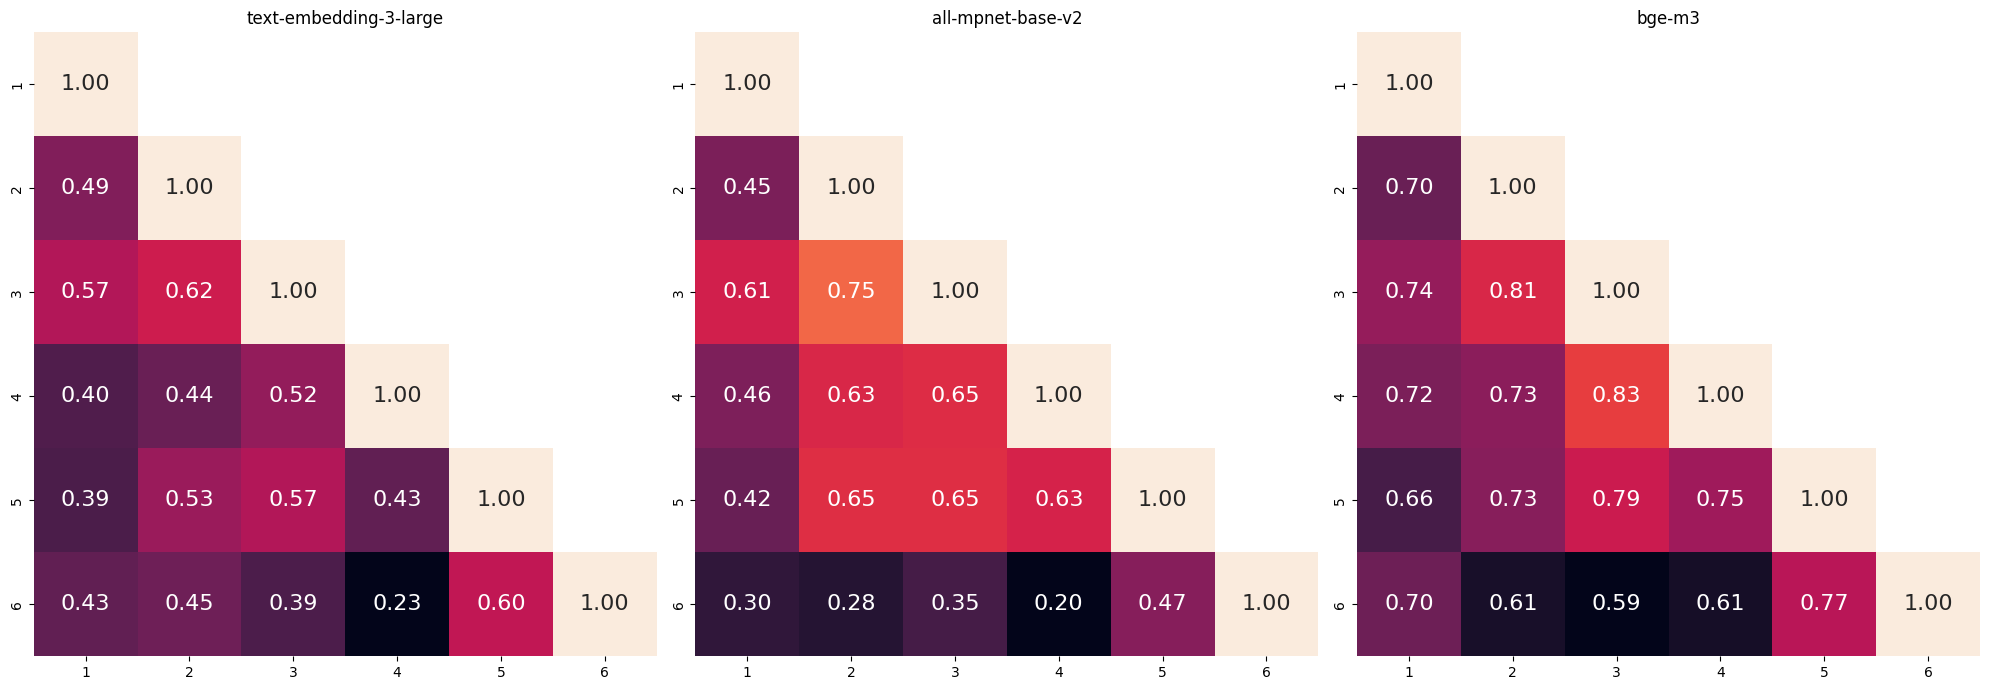

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 7))  # Adjust the figure size as needed

# Create a mask
mask = np.triu(np.ones_like(openai_matrix, dtype=bool))
np.fill_diagonal(mask, False)

# Creating a 2x3 grid of heatmaps
heatmaps = [
    (openai_matrix, "text-embedding-3-large"),
    (mpnet_matrix, "all-mpnet-base-v2"),
    (bge_matrix, "bge-m3"),
]

for idx, (matrix, title) in enumerate(heatmaps, start=1):
    plt.subplot(1, 3, idx)
    sns.heatmap(matrix, mask=mask, fmt='.2f', xticklabels=[x+1 for x in range(len(sentences))], yticklabels=[x+1 for x in range(len(sentences))], annot=True, cbar=False, annot_kws={"fontsize": 16})
    plt.title(title)

# Show the plot
plt.tight_layout()
plt.show()

## LangChain
Finally, we demonstrate how to use OpenAI's GPT models through the LangChain framework, which simplifies working with LLMs in applications.

We're using GPT-4o mini with temperature set to 0 for deterministic, consistent outputs. The temperature parameter is crucial during training and inference - lower values (like 0) make the model choose the most probable tokens, while higher values increase randomness and creativity. Here we want precision rather than creativity, so we use a zero temperature.

## 1. The LLM Landscape

### Open-Source vs Closed-Source Models

| **Closed-Source (Proprietary)** | **Open-Source** |
|----------------------------------|------------------|
| OpenAI (GPT-4, GPT-3.5) | Llama 3 (Meta) |
| Anthropic (Claude) | Mistral 7B/8x7B |
| Google (Gemini) | Phi-3 (Microsoft) |
| Cohere | Falcon |

### Key Considerations

**Closed-Source**:
- Better performance (usually)
- No hosting required
- Pay per token
- Data sent to third party

**Open-Source**:
- Full control and privacy
- Can fine-tune
- Self-hosting costs
- May need GPU infrastructure

In [27]:
from langchain_openai import ChatOpenAI

# Different OpenAI models
models = {
    "GPT-5-nano": ChatOpenAI(model="gpt-5-nano"),
    "GPT-4o": ChatOpenAI(model="gpt-4o", temperature=0),
    "GPT-3.5-turbo": ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
}

# Test prompt
prompt = "Explain quantum computing in exactly 2 sentences."

print("Comparing OpenAI models:\n")
for name, model in models.items():
    response = model.invoke(prompt)
    print(f"[{name}]")
    print(response.content)
    print()

Comparing OpenAI models:

[GPT-5-nano]
A quantum computer uses quantum bits, or qubits, that can exist in superpositions of 0 and 1 and can become entangled with one another. By applying quantum gates and exploiting interference, it can process many possibilities simultaneously and, for certain problems, solve them faster than classical computers, though it faces challenges like decoherence and the need for error correction.

[GPT-4o]
Quantum computing leverages the principles of quantum mechanics to process information using quantum bits, or qubits, which can exist in multiple states simultaneously, unlike classical bits that are either 0 or 1. This allows quantum computers to potentially solve complex problems much faster than classical computers by performing many calculations in parallel.

[GPT-3.5-turbo]
Quantum computing is a type of computing that uses quantum-mechanical phenomena, such as superposition and entanglement, to perform operations on data. It has the potential to sol

## 5. Using Open-Source Models with Ollama

Ollama allows you to run open-source models locally.

**Setup:**
1. Install Ollama from https://ollama.ai
2. Run: `ollama pull deepseek-r1:1.5b` or `ollama pull mistral`
3. Start Ollama service

In [28]:
local_llm = None
try:
    from langchain_ollama import ChatOllama

    # Using Llama 3 locally
    local_llm = ChatOllama(
        model="deepseek-r1:1.5b",
        temperature=0
    )

    response = local_llm.invoke("What are the benefits of running AI models locally?")
    print("Local deepseek-r1:1.5b response:")
    print(response.content)

except Exception as e:
    print(f"ℹ️  Ollama not running: {e}")
    print("Install Ollama and run 'ollama pull deepseek-r1:1.5b' to use local models")

ℹ️  Ollama not running: No module named 'langchain_ollama'
Install Ollama and run 'ollama pull deepseek-r1:1.5b' to use local models


In [29]:
if not local_llm:
    from transformers import AutoTokenizer, AutoModelForCausalLM

    tokenizer = AutoTokenizer.from_pretrained("unsloth/DeepSeek-R1-Distill-Llama-8B-unsloth-bnb-4bit")
    local_llm = AutoModelForCausalLM.from_pretrained("unsloth/DeepSeek-R1-Distill-Llama-8B-unsloth-bnb-4bit")
    local_llm.to(device)

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

## Building a Text Generation Framework
With tokenization understood, we now advance to text generation. This requires managing the complex search process through token probability space. We'll create visualization tools to understand this process and implement a greedy search algorithm to generate text completions.

In [30]:
import time
import locale

locale.getpreferredencoding = lambda: "UTF-8"

Our `GraphManager` class creates a tree structure to represent possible token sequences. Each node in the tree represents a token, with attributes tracking its probability score and position in the sequence. This structure will help us visualize the token selection process during text generation.

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

class GraphManager:
    def __init__(self, beams=1, length=5, text=""):
        self.beams = beams
        self.length = length
        self.text = text
        self.graph = self.create_graph()

    def create_graph(self):
        graph = nx.balanced_tree(self.beams, self.length, create_using=nx.DiGraph())
        nx.set_node_attributes(graph, 100, "tokenscore")
        nx.set_node_attributes(graph, 0, "sequencescore")
        nx.set_node_attributes(graph, 0, "cumscore")
        nx.set_node_attributes(graph, self.text, "token")
        return graph

    def get_best_sequence(self):
        """
        Get the best sequence of tokens and its maximum score.

        Parameters:
            graph (nx.DiGraph): The graph representing the sequences.

        Returns:
            tuple: A tuple containing the best sequence and its maximum score.
        """
        # Create a list of leaf nodes
        leaf_nodes = [node for node in self.graph.nodes() if self.graph.out_degree(node) == 0]

        # Get the leaf node with the highest sequencescore
        max_score_node = max(
            leaf_nodes, key=lambda node: self.graph.nodes[node]["sequencescore"]
        )

        # Retrieve the sequence of nodes from this leaf node to the root node in a list
        path = nx.shortest_path(self.graph, source=0, target=max_score_node)

        # Return the string of token attributes of this sequence
        sequence = " ".join([self.graph.nodes[node]["token"].split("_")[0] for node in path])

        return sequence, self.graph.nodes[max_score_node]["sequencescore"]

The `plot_graph` function creates beautiful visualizations of our token selection tree. Each node is color-coded based on token probability, helping us understand which tokens the model considers most likely at each step of generation.

In [32]:
def plot_graph(graph, score, args=""):
    """
    Plot the graph with nodes colored based on scores.

    Parameters:
        score (str): Score type, either 'token' or 'sequence'.
        cmap_name (str, optional): The name of the colormap. Defaults to 'rg'.
    """

    width, height = 3 + 1.2 * graph.beams**graph.length, max(4, 2 + graph.length)
    if args == '-Grankdir="LR"':
        height = 2
    fig, ax = plt.subplots(figsize=(width, height), dpi=300, facecolor="white")

    # Create positions for each node
    pos = nx.nx_agraph.graphviz_layout(graph.graph, prog="dot", args=args)

    # Determine the data key based on the score type
    score_key = "tokenscore" if score == "token" else "sequencescore"

    # Extract scores and compute normalization parameters
    node_data = graph.graph.nodes(data=True)
    scores = [data[score_key] for _, data in node_data if data["token"] is not None]
    vmin, vmax = min(scores), max(scores)
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # Create a colormap with three colors
    cmap = LinearSegmentedColormap.from_list("rg", ["r", "y", "g"], N=256)

    # Draw the nodes with colors based on their scores
    node_colors = [
        data[score_key] for _, data in node_data if data["token"] is not None
    ]

    nx.draw_networkx_nodes(
        graph.graph,
        pos,
        node_size=2000,
        node_shape="o",
        alpha=1,
        linewidths=4,
        node_color=node_colors,
        cmap=cmap,
    )

    # Draw the edges
    nx.draw_networkx_edges(graph.graph, pos)

    # Prepare node labels based on the score type
    label_format = "{:.2f}%" if score == "token" else "{:.2f}"
    labels = {
        node: f"{data['token'].split('_')[0]}\n{label_format.format(data[score_key])}"
        for node, data in node_data
        if data["token"] is not None
    }

    # Draw the labels
    nx.draw_networkx_labels(graph.graph, pos, labels=labels, font_size=10)
    plt.box(False)

    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    label_text = "Token probability (%)" if score == "token" else "Sequence score"
    fig.colorbar(sm, ax=ax, orientation="vertical", pad=0, label=label_text)

    plt.show()

### Implementing Greedy Text Generation
Now we implement the core text generation algorithm. The `GreedyTextGenerator` class will use our language model to predict the next most likely tokens given an input prompt, building sequences token by token.

In [33]:
class GreedyTextGenerator:
    def __init__(self, model, tokenizer, beams=1, decoder_mode=False):
        self.model = model
        self.tokenizer = tokenizer
        self.decoder_mode = decoder_mode
        self.beams = beams

    def _greedy_sampling(self, logits):
        return torch.topk(logits, self.beams).indices


    def run_greedy(self, text, number_of_outputs):
        # Ensure input is on the same device as the model
        encoded_input_ids = self.tokenizer(text).input_ids
        encoded_input_ids = torch.tensor(encoded_input_ids, dtype=torch.long).unsqueeze(dim=0).to(self.model.device)

        decoder_input_ids = None
        if self.decoder_mode:
            decoder_input_ids = torch.tensor([self.model.config.decoder_start_token_id],
                                              dtype=torch.long).unsqueeze(dim=0).to(self.model.device)

        graph_manager = GraphManager(beams=self.beams, length=number_of_outputs, text=text)

        self._greedy_search(encoded_input_ids, 0, number_of_outputs, graph_manager.graph, decoder_input_ids)
        return graph_manager

    def _greedy_search(self, encoded_input, node, length, graph, decoder_input=None):
        if length:
            # Ensure inputs are on the same device
            if decoder_input is not None:
                outputs = self.model(input_ids=encoded_input, decoder_input_ids=decoder_input)
            else:
                outputs = self.model(encoded_input)

            logits = outputs.logits[0, -1, :]
            top_token_ids = self._greedy_sampling(logits)

            for j, token_id in enumerate(top_token_ids):
                # Ensure new tensors are on the same device
                if decoder_input is not None:
                    new_encoded_inputs = torch.cat((decoder_input,
                                                    torch.tensor([token_id], dtype=torch.long)
                                                    .unsqueeze(dim=0)
                                                    .to(self.model.device)),
                                                  dim=1)
                else:
                    new_encoded_inputs = torch.cat((encoded_input,
                                                    torch.tensor([token_id], dtype=torch.long)
                                                    .unsqueeze(dim=0)
                                                    .to(self.model.device)),
                                                  dim=1)

                current_node = list(graph.successors(node))[j]
                token_score = torch.log(torch.softmax(logits, dim=-1)[token_id])
                cumulative_score = graph.nodes[node]["cumscore"] + token_score.item()

                graph.nodes[current_node].update({
                    "tokenscore": np.exp(token_score.item()) * 100,
                    "cumscore": cumulative_score,
                    "sequencescore": 1 / (len(new_encoded_inputs.squeeze())) * cumulative_score,
                    "token": self.tokenizer.decode(token_id, skip_special_tokens=True) + f"_{length}_{j}"
                })

                # Recursively call with device-consistent inputs
                if decoder_input is not None:
                    self._greedy_search(encoded_input, current_node, length - 1, graph, decoder_input=new_encoded_inputs)
                else:
                    self._greedy_search(new_encoded_inputs, current_node, length - 1, graph, decoder_input)

The greedy search algorithm always selects the highest probability token at each step. With our "beams" parameter set to 3, it will explore the top 3 most likely tokens at each step, creating a branching tree of possibilities. This implementation handles both encoder-only and decoder-only model architectures.

## Running Text Generation with a Large Language Model
Let's put our text generation system to work using a powerful language model. We'll use a prompt about the "secret of a perfect dinner" and see what the model generates.

In [34]:
TEXT = "The secret of a perfect dinner is"
NUMBER_OF_OUTPUTS = 4

We're using DeepSeek's 8B parameter Llama model, a powerful but efficient LLM that balances performance and speed. The beam parameter of 3 means we're exploring the top 3 most likely tokens at each step, giving us a broader view of the model's generation process. The visualized tree helps us understand which token sequences the model considers most probable.

In [35]:
text_generator = GreedyTextGenerator(local_llm, tokenizer, decoder_mode=False, beams = 3)
graph_m = text_generator.run_greedy(TEXT, NUMBER_OF_OUTPUTS)

In [36]:
sequence, max_score = graph_m.get_best_sequence()
print(f"Generated text: {sequence}, score: {max_score}")

Generated text: The secret of a perfect dinner is  not  just  the  food, score: -0.22884114583333331


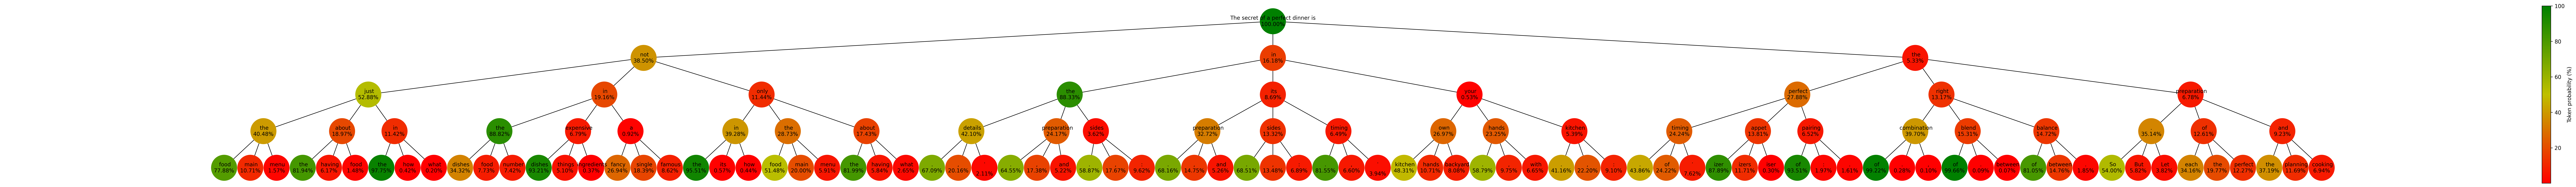

In [37]:
# Plot graph
plot_graph(graph_m, "token")

## Test model parameters

In [38]:
from langchain_openai import ChatOpenAI

# Demonstrate different temperature settings
prompt = "The secret of a perfect dinner is"

temperatures = [0.0, 0.5, 1.0, 1.5]

print("Effect of Temperature on Creativity:\n")
for temp in temperatures:
    llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=temp, max_tokens=30)
    response = llm.invoke(prompt)
    print(f"Temperature {temp} Attempt 1: {response.content}\n")
    response = llm.invoke(prompt)
    print(f"Temperature {temp} Attempt 2: {response.content}\n")

Effect of Temperature on Creativity:

Temperature 0.0 Attempt 1:  a combination of delicious food, good company, and a welcoming atmosphere. It's important to put thought and effort into planning the menu, preparing the dishes

Temperature 0.0 Attempt 2:  a combination of delicious food, good company, and a welcoming atmosphere. It's about creating a balance of flavors, textures, and presentation that will delight

Temperature 0.5 Attempt 1:  in the balance of flavors, textures, and presentation. It's important to choose high-quality ingredients, prepare them with care, and season them thoughtfully

Temperature 0.5 Attempt 2:  a combination of delicious food, great company, and a welcoming atmosphere. It is important to put thought and effort into the menu, ensuring that there is

Temperature 1.0 Attempt 1:  creating a balance of flavors, textures, and colors. It's also about using fresh, high-quality ingredients, cooking with love and care, and paying

Temperature 1.0 Attempt 2: A com

## 🎯 Exercise 2: Multi-Model Comparison

**Task**: Create a function that:
1. Takes a question as input
2. Sends it to multiple models (at least 2)
3. Compares their responses
4. Reports response time and token usage

In [39]:
import time

def compare_models(question, models_dict):
    """
    Compare responses from multiple LLM models

    Args:
        question: The question to ask
        models_dict: Dictionary of model_name: model_instance

    Returns:
        Dictionary with results for each model
    """
    # TODO: Implement this function
    pass

# Test your function
# models = {
#     "GPT-3.5": ChatOpenAI(model="gpt-3.5-turbo"),
#     "GPT-4o-mini": ChatOpenAI(model="gpt-4o-mini")
# }
# compare_models("What is the future of AI?", models)

## 🎯 Exercise 3: Semantic Search

**Task**: Build a simple semantic search:
1. Create a list of 10 technical topics
2. Embed all topics
3. Take a query and find the most similar topic

In [40]:
def semantic_search(query, documents, embeddings_model, top_k=3):
    """
    Find most similar documents to query using embeddings

    Args:
        query: Search query
        documents: List of documents to search
        embeddings_model: Embeddings model to use
        top_k: Number of results to return

    Returns:
        List of (document, similarity_score) tuples
    """
    # TODO: Implement this function
    pass

# Test your function
# topics = [
#     "Machine Learning Algorithms",
#     "Web Development with React",
#     # ... add more topics
# ]
# semantic_search("AI training methods", topics, embeddings)

## Summary

In this notebook, you learned:

✅ The landscape of LLM providers (OpenAI, Anthropic, Google, open-source)  
✅ How to use different models in LangChain  
✅ What embeddings are and how they work  
✅ Semantic similarity and search  
✅ Model selection strategies  
✅ Temperature and other parameters  

**Next**: We'll dive into Prompt Engineering and Templates!